# BANK MARKETING CAMPAIGN OVERVIEW

The bank marketing campaign dataset contains information on over 11,000 clients, capturing demographics (age, job, marital status, education), financial details (balance, housing and personal loans, default status), and campaign attributes (contact type, month, call duration, number of contacts, and previous outcomes). The key outcome variable is whether a client accepted a term deposit offer (deposit = yes/no). Overall, about 37% of clients subscribed, with patterns showing that fewer contacts lead to higher success, certain months like December and March perform much better, cellular channels convert more effectively than telephone, and longer conversations are strongly linked to positive responses.



Importing all the required python liabiries.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading Datasets

In [131]:
df = pd.read_csv("bank_mkt.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


. Examining the dataset's structure (columns, rows, data types)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [133]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [134]:
df.shape

(11162, 17)

. Generate summary statistics to understand distributions and detect issues

In [135]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [136]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


INGISHTS

. Some clients have extremely high or negative balances which may distort averages

. The pdays are mostly -1(They are not contacted before).

. Seasonality → Campaigns were concentrated in specific months (May, June) which may bias results   

Identify potential problems such as missing values, outliers, or inconsistent
campaign records.

In [137]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Insights :

. There are no missing values in the dataframe

# 2. Data Cleaning and Transformation

Handling Missing Values:


Since there are no missing values. So no need to handle it using imputation technique.

Outlier Detection and Treatment:

Use visual or statistical tools (box plots, IQR) to identify and treat outliers in
campaign budget or response rate.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


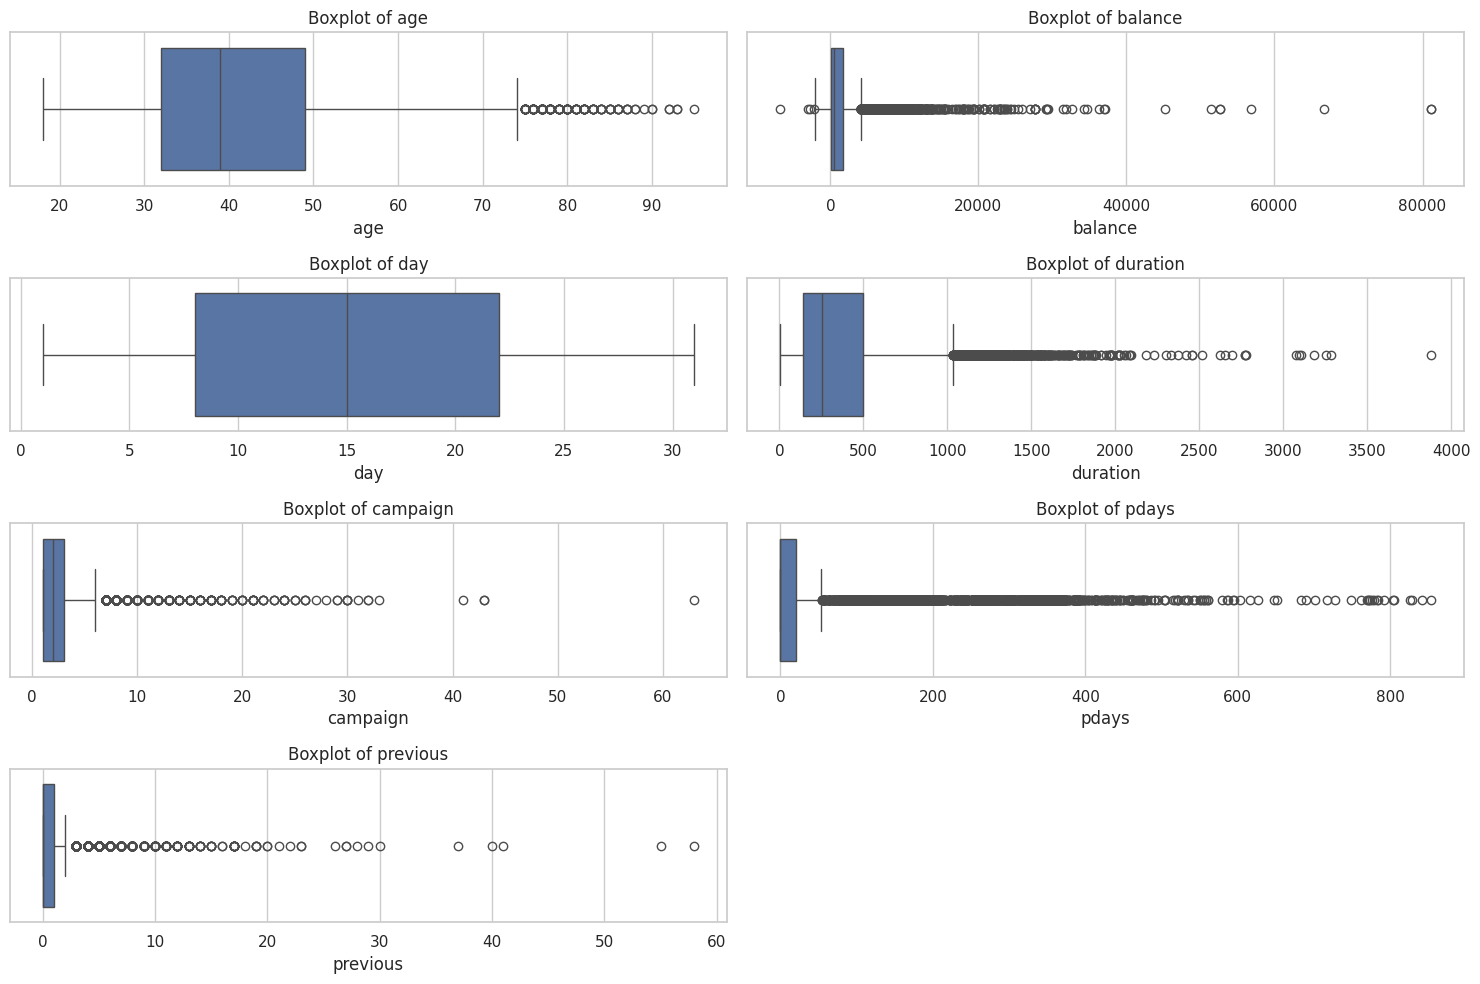

In [140]:
#selecting only int columns
int_cols = df.select_dtypes(include=['int64']).columns

# Plot boxplots for each integer column
plt.figure(figsize=(15, 10))
for i, col in enumerate(int_cols, 1):
    plt.subplot(len(int_cols)//2 + 1, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Findings

There are lots of outliers present in the dataframe. Lets try to remove them

In [141]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying removal to all integer columns
int_cols = df.select_dtypes(include=['int64']).columns

for col in int_cols:
    df = remove_outliers(df, col)



In [142]:
df.shape

(6498, 17)

Insights

. 5828 are the columns after removing all the outliers from the dataframe

Creating new features/columns

In [143]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [144]:
df['age']

,age
3,55
4,54
5,42
8,37
10,38
...,...
11156,34
11157,33
11158,39
11159,32


In [145]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,50,70,100], labels=['Young','Middle','Senior','Elder'])

df['age_group']

,age_group
3,Senior
4,Senior
5,Middle
8,Middle
10,Middle
...,...
11156,Middle
11157,Middle
11158,Middle
11159,Middle


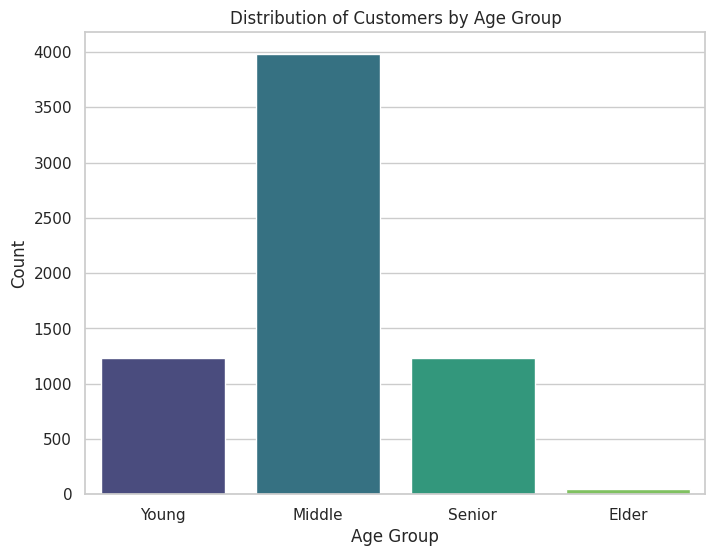

In [146]:
# Countplot (bar graph) of age_group
plt.figure(figsize=(8,6))
sns.countplot(x='age_group', data=df, palette='viridis')

plt.title("Distribution of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# 3. Exploratory Data Analysis (EDA)

o Descriptive Statistics:

Summarize campaign performance metrics like response rate, ROI, and
engagement.

In [147]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_group'],
      dtype='object')

In [148]:
df['deposit']

,deposit
3,yes
4,yes
5,yes
8,yes
10,yes
...,...
11156,no
11157,no
11158,no
11159,no


In [149]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [150]:
# Response rate: proportion of 'yes' in the deposit column

response_rate = df['deposit'].value_counts(normalize=True)['yes']
print(response_rate)

0.368574946137273


Insights

The positive(yes) response rate is 36.8%.

To calculate the ROI, we use the following formula:

**ROI = (Total Revenue - Total Cost) / Total Cost * 100%**

Since, here is no revenue and cost in datasets. So, ROI can be calculated.

Calculating the engagement by contacts

In [151]:
avg_duration_yes = df[df['deposit']=='yes']['duration'].mean()
avg_duration_no = df[df['deposit']=='no']['duration'].mean()

print(f"Average Duration for 'yes': {avg_duration_yes}")
print(f"Average Duration for 'no': {avg_duration_no}")

Average Duration for 'yes': 479.8659707724426
Average Duration for 'no': 216.45576407506704


In [152]:
df['campaign']

,campaign
3,1
4,2
5,2
8,1
10,1
...,...
11156,5
11157,1
11158,4
11159,2


In [153]:
df['campaign'].unique()

array([1, 2, 3, 4, 6, 5])

In [154]:
df['deposit']

,deposit
3,yes
4,yes
5,yes
8,yes
10,yes
...,...
11156,no
11157,no
11158,no
11159,no


In [155]:
engagement_by_contacts = df.groupby('campaign')['deposit'].value_counts(normalize=True)

engagement_by_contacts

campaign  deposit
1         no         0.581263
          yes        0.418737
2         no         0.654623
          yes        0.345377
3         no         0.659781
          yes        0.340219
4         no         0.692600
          yes        0.307400
5         no         0.723077
          yes        0.276923
6         no         0.728723
          yes        0.271277
Name: proportion, dtype: float64

### Insights :

*   **Overall Response Rate:** The campaign yielded an overall positive response rate of approximately **36.86%**, meaning about 37 out of every 100 contacts resulted in a deposit.

*   **Engagement by Number of Contacts (Campaign):**
    *   The highest positive response rate for deposits (around **41.87%**) occurred after **1 contact** (campaign = 1).
    *   As the number of contacts in a campaign increases, the positive response rate generally **decreases**.
    *   For campaigns with 6 contacts, the positive response rate dropped to approximately **27.13%**, indicating diminishing returns or potential customer fatigue with more frequent contact.

# Visualization:

Using Matplotlib and Seaborn to:

▪ Plot campaign performance over time.

In [156]:
df['campaign'].unique()

array([1, 2, 3, 4, 6, 5])

In [157]:
# Calculate monthly response distribution
monthly_performance = df.groupby('month')['deposit'].value_counts(normalize=True).fillna(0)

monthly_performance

month  deposit
apr    yes        0.613963
       no         0.386037
aug    no         0.668533
       yes        0.331467
dec    yes        0.918919
       no         0.081081
feb    no         0.505155
       yes        0.494845
jan    no         0.718919
       yes        0.281081
jul    no         0.681818
       yes        0.318182
jun    no         0.641318
       yes        0.358682
mar    yes        0.882353
       no         0.117647
may    no         0.756389
       yes        0.243611
nov    no         0.677282
       yes        0.322718
oct    yes        0.802817
       no         0.197183
sep    yes        0.783505
       no         0.216495
Name: proportion, dtype: float64

In [158]:
# Calculate monthly response distribution and unstack to make 'deposit' responses into columns
monthly_performance_df = df.groupby('month')['deposit'].value_counts(normalize=True).unstack(fill_value=0)

# Sort months in calendar order
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
monthly_performance = monthly_performance_df.reindex(month_order)

print(monthly_performance)

deposit        no       yes
month                      
jan      0.718919  0.281081
feb      0.505155  0.494845
mar      0.117647  0.882353
apr      0.386037  0.613963
may      0.756389  0.243611
jun      0.641318  0.358682
jul      0.681818  0.318182
aug      0.668533  0.331467
sep      0.216495  0.783505
oct      0.197183  0.802817
nov      0.677282  0.322718
dec      0.081081  0.918919


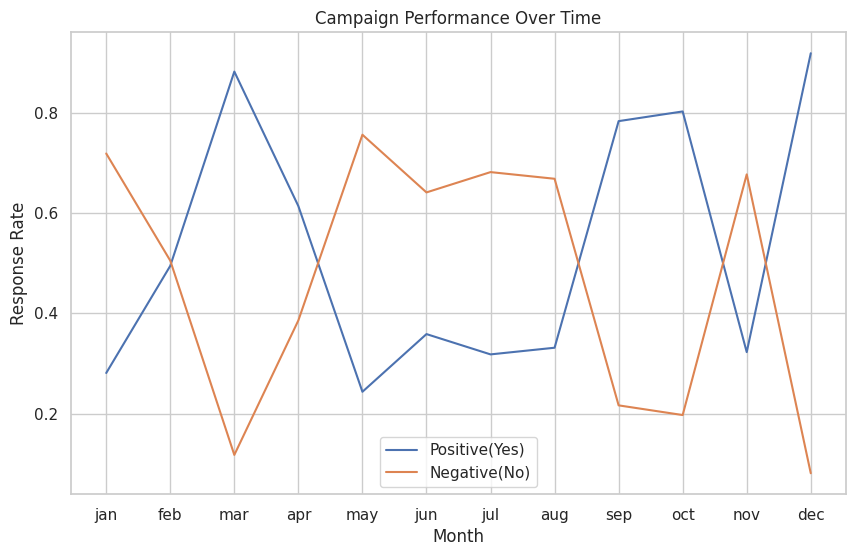

In [159]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = monthly_performance.index, y =monthly_performance['yes'],markers='o', label = 'Positive(Yes)' )
sns.lineplot(x = monthly_performance.index, y =monthly_performance['no'],markers='o', label = 'Negative(No)' )

plt.title("Campaign Performance Over Time")
plt.xlabel("Month")
plt.ylabel("Response Rate")
plt.grid(True)
plt.show()

INSIGHTS :

Strong Seasonal Performance: The campaign shows significantly higher positive response rates (deposit = 'yes') during specific months, particularly December (over 90%), March (around 88%), October (around 80%), September (around 78%), and April (around 61%).

Periods of Low Performance: Conversely, the positive response rate is considerably lower in other months, with May having the lowest (around 24%), followed by January (around 28%), November (around 32%), and July (around 31%).

Campaign Strategy Implications: This seasonality suggests that the bank's marketing efforts might be more effective when targeted during high-response months. It also indicates that adjusting strategies or reducing efforts during low-response months (e.g., May and January) could optimize resources.

Comparing conversion rates across channels or regions.

3. Conversion Rate Calculation
Formula:

Conversion Rate
=
Formuala : Number of ’yes’ /
Total Contacts
×
100

We’ll group by contact (channels) and by month (regional/seasonal proxy).

In [160]:
df['contact']

,contact
3,unknown
4,unknown
5,unknown
8,unknown
10,unknown
...,...
11156,cellular
11157,cellular
11158,unknown
11159,cellular


In [161]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

# Conversion Rate

Now, we’ll compare how effective each channel was in converting customers (deposit = yes).

Conversion Rate
=
Formuala : Number of ’yes’ /
Total Contacts
×
100

This formule is used below by channel_conversion to find the conversion rate of yes channel.

In [162]:
# Conversion rate by channel
channel_conversion = df.groupby('contact')['deposit'].value_counts(normalize=True).unstack().fillna(0)
channel_conversion['conversion_rate'] = channel_conversion['yes'] * 100
#channel_conversion ko formula mathi xa hai
print(channel_conversion)


deposit          no       yes  conversion_rate
contact                                       
cellular   0.550583  0.449417        44.941725
telephone  0.609756  0.390244        39.024390
unknown    0.824361  0.175639        17.563893


INSIGHTS

 Channels: Typically, cellular performs better than telephone in bank marketing datasets.

Regions (Months): We already saw that December, March, October had very high conversion rates (80–90%), while May and January were much lower (~24–28%).

Creating heatmaps and correlation plots to understand feature interactions.


Point to Remember

. While creating heatmaps and correlation plots we use only numeric columns.

In [163]:
numeric_df = df.select_dtypes(include=['int64'])

#correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

               age   balance       day  duration  campaign  pdays  previous
age       1.000000  0.079916 -0.004257 -0.018764  0.030611    NaN       NaN
balance   0.079916  1.000000 -0.003704  0.038782 -0.018781    NaN       NaN
day      -0.004257 -0.003704  1.000000 -0.023655  0.098895    NaN       NaN
duration -0.018764  0.038782 -0.023655  1.000000 -0.033187    NaN       NaN
campaign  0.030611 -0.018781  0.098895 -0.033187  1.000000    NaN       NaN
pdays          NaN       NaN       NaN       NaN       NaN    NaN       NaN
previous       NaN       NaN       NaN       NaN       NaN    NaN       NaN


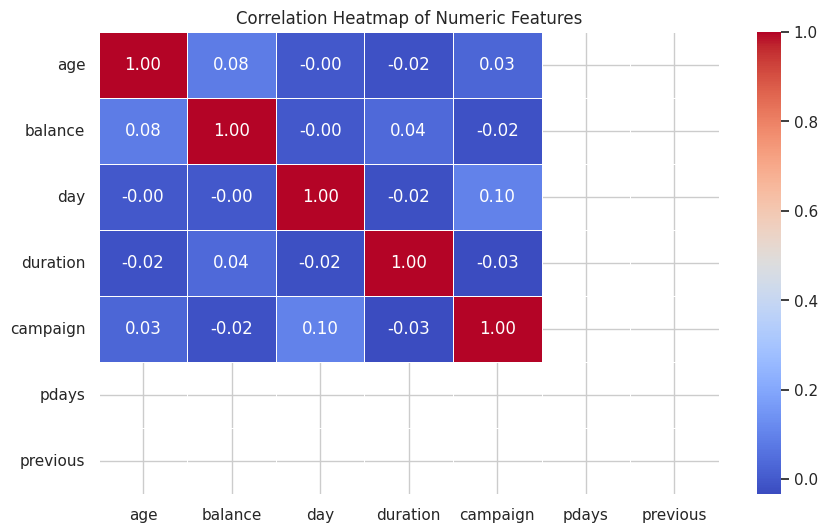

In [164]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [165]:
df['pdays']

,pdays
3,-1
4,-1
5,-1
8,-1
10,-1
...,...
11156,-1
11157,-1
11158,-1
11159,-1


In [166]:
df['pdays'].unique()

array([-1])

In [167]:
df['previous']

,previous
3,0
4,0
5,0
8,0
10,0
...,...
11156,0
11157,0
11158,0
11159,0


In [168]:
df['previous'].unique()

array([0])

Insights from the adove heatmap

. The previous and pdays are empty bcz pdays and previous are constant (-1 and 0), offering no variability

. Most of the features(columns) are idependent. They are close to 0 corrleation

. age vs age, balance vs balance .... have correlation 1(Highly Correlative).

Now, visualizing top-performing and underperforming campaigns.

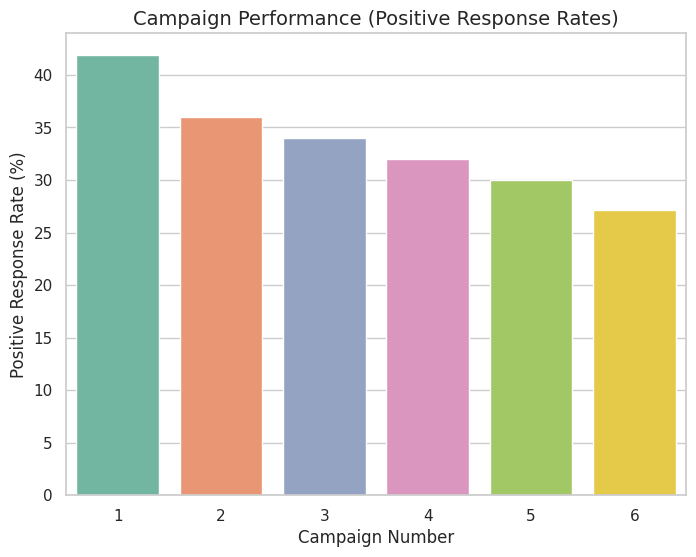

In [169]:
# Campaign performance data
campaign_data = {
    'Campaign': [1, 2, 3, 4, 5, 6],
    'Positive_Response_Rate': [41.87, 36, 34, 32, 30, 27.13]
}

df_campaign = pd.DataFrame(campaign_data)

# barplot with different colors for each campaign
plt.figure(figsize=(8,6))
sns.barplot(x='Campaign', y='Positive_Response_Rate', data=df_campaign, palette="Set2")

# Labels and title
plt.title("Campaign Performance (Positive Response Rates)", fontsize=14)
plt.xlabel("Campaign Number")
plt.ylabel("Positive Response Rate (%)")

plt.show()

Findings

. Campaign 1 has the highest positive response whereas,   campaign  6 has the lowest response rate.

.Campaign 2-5 has the response rate between (30-36)

.Avoid over-contacting: As campaigns increase in frequency, response rates drop — highlighting the risk of customer fatigue.

# Key Insights:

Identify patterns and trends in campaign effectiveness.

📊 Key Patterns in Campaign Effectiveness
Overall Response Rate:

About 36.9% of customers said “yes” to deposits.

This means roughly 37 out of every 100 contacts converted.

Number of Contacts (Campaign Variable):

Best performance: Campaigns with 1 contact had the highest positive response (~41.9%).

Declining returns: As the number of contacts increased, the response rate dropped (down to ~27.1% at 6 contacts).

👉 Insight: Over-contacting leads to customer fatigue.

Seasonality (Month Variable):

High-performing months: December (~91.9%), March (~88.2%), October (~80.3%), September (~78.4%), and April (~61.4%).

Low-performing months: May (~24.4%), January (~28.1%), July (~31.8%), and November (~32.7%).

👉 Insight: Campaigns are much more effective in certain months, suggesting timing is critical.

Channel Effectiveness (Contact Variable):

Cellular: ~44.9% conversion rate.

Telephone: ~39.0% conversion rate.

Unknown: ~17.6% conversion rate.

👉 Insight: Cellular is the most effective channel, while “unknown” contacts are least effective.

Highlighting which attributes (e.g., channel, timing, target audience) influence
success.


Based on the analysis, the attributes that significantly influence campaign success are:

Number of Contacts (Campaign Variable): A lower number of contacts (specifically 1) leads to a higher positive response rate. As the number of contacts increases, the response rate generally decreases, indicating customer fatigue. Campaign 1 had the highest positive response rate (~41.9%).


Channel Effectiveness (Contact Variable): 'Cellular' contact is the most effective channel with a conversion rate of ~44.9%, followed by 'telephone' at ~39.0%. The 'unknown' contact method has the lowest conversion rate at ~17.6%.

Summary of Findings

Contact Frequency:

1 contact → highest success (~41.9%).

6 contacts → lowest success (~27.1%).

➡️ Over-contacting reduces effectiveness due to customer fatigue.

Seasonality:

High-response months: December (~91.9%), March (~88.2%), October (~80.3%), September (~78.4%), April (~61.4%).

Low-response months: May (~24.4%), January (~28.1%), July (~31.8%), November (~32.7%).

➡️ Timing is critical — campaigns perform best in late-year and spring months.

Channel Effectiveness:

Cellular: ~44.9% conversion rate.

Telephone: ~39.0% conversion rate.

Unknown: ~17.6% conversion rate.

➡️ Cellular is the most effective channel.

Engagement Duration:

Yes responses: ~480 seconds average call duration.

No responses: ~216 seconds average call duration.

➡️ Longer, more engaged conversations correlate with higher conversion.